In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from itertools import groupby

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as sa
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect,desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores

lastdate = session.query(func.max(Measurement.date)).scalar()
print(lastdate)
ldate = dt.datetime.strptime(lastdate, '%Y-%m-%d').date()

year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').\
        filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df=pd.DataFrame(data=year, columns=['date', 'precipitation']).set_index('date')
df=df.sort_values('date', ascending=True)

df=df.dropna()


2017-08-23


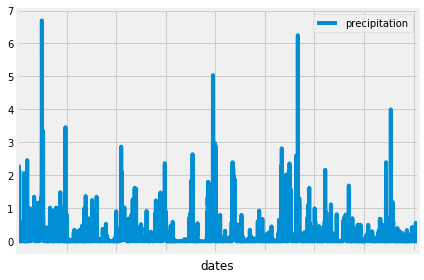

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data

ax= df.plot(legend=True)
ax.set(xlabel="dates")
ax.set_xticklabels([])
plt.tight_layout()
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [13]:
# Design a query to calculate the total number of stations.
totalstations= session.query(Station).count()
print(f'There are {totalstations} stations in this dataset')

There are 9 stations in this dataset


In [14]:
# Design a query to find the most active station.
active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active[0]

('USC00519281', 2772)

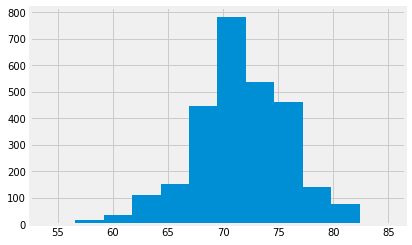

In [15]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).

station_tag = 'USC00519281'

station_tobs = session.query(Measurement.tobs).filter(Measurement.station == station_tag).all()
df3= pd.DataFrame(station_tobs)
df3.sort_values('tobs', ascending=True)

plt.hist(df3["tobs"], bins=12)

plt.show()

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]
